<img src="./images/coronavirus_icon-1.jpg" style="float: left; margin: 20px; height: 75px">

# Capstone: Covid-19 Study

## 2.  EDA

In [7]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read in Datasets

merge_1 = pd.read_csv('../us_datasets/merged_1.csv')
merge_2 = pd.read_csv('../us_datasets/merged_2.csv')
merge_3 = pd.read_csv('../us_datasets/merged_3.csv')

### Create Correlation Heatmaps

Create correlation heatmaps with df_nonull dataset to check collineararity to further reduce feature count.

In [5]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3013 non-null   int64  
 1   population_male                    3013 non-null   float64
 2   population_female                  3013 non-null   float64
 3   population_age_00_09               3013 non-null   float64
 4   population_age_10_19               3013 non-null   float64
 5   population_age_20_29               3013 non-null   float64
 6   population_age_30_39               3013 non-null   float64
 7   population_age_40_49               3013 non-null   float64
 8   population_age_50_59               3013 non-null   float64
 9   population_age_60_69               3013 non-null   float64
 10  population_age_70_79               3013 non-null   float64
 11  population_age_80_and_older        3013 non-null   float

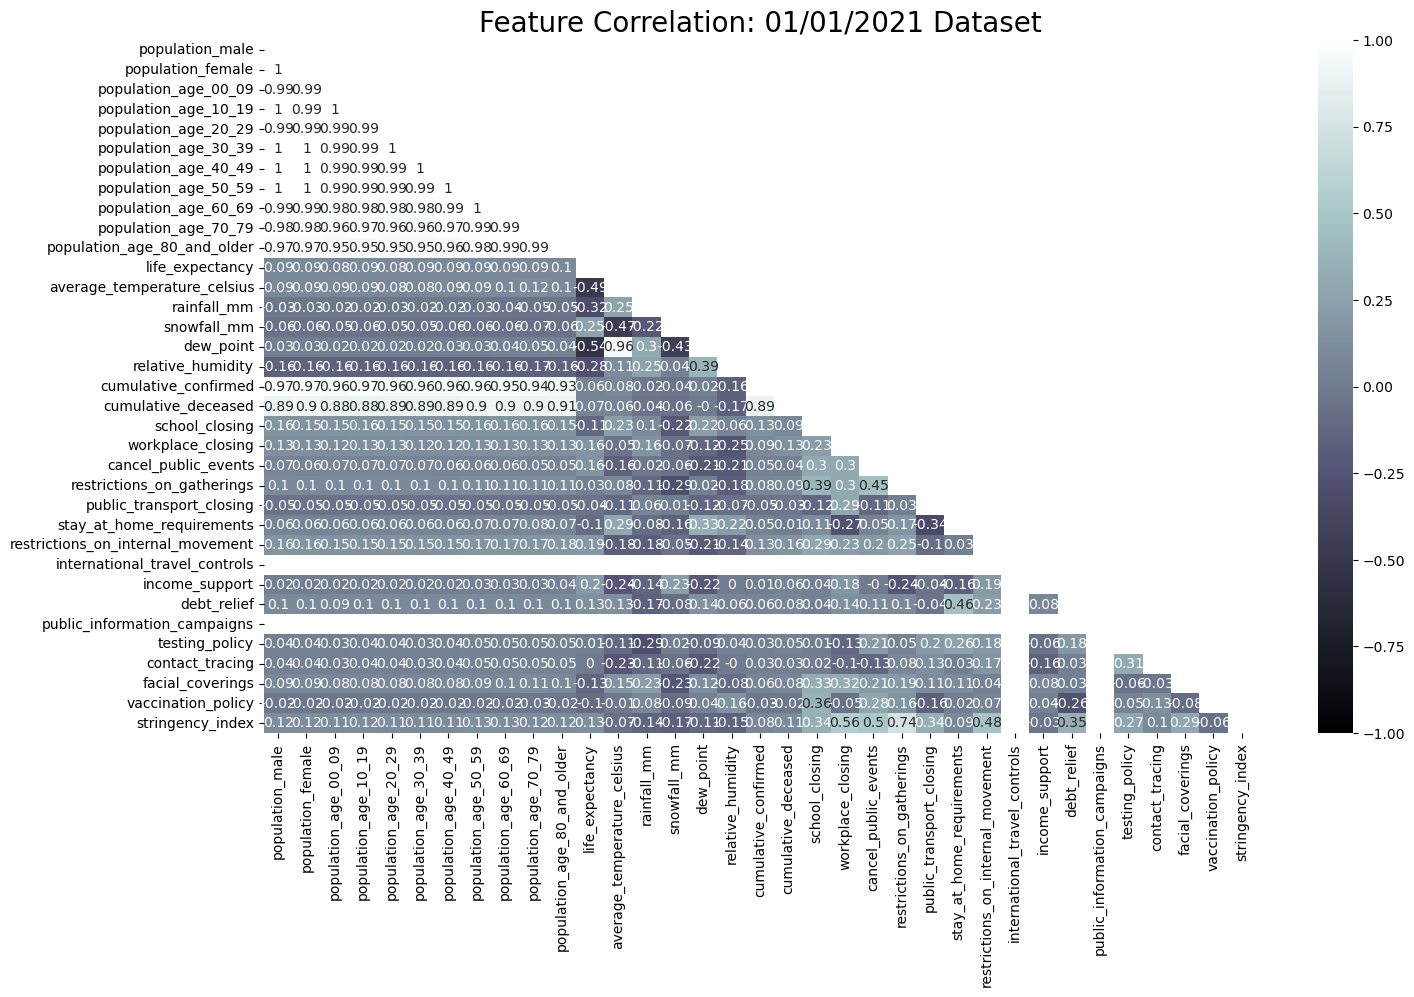

In [12]:
merge_1_corr = merge_1.drop(columns = ['Unnamed: 0', 'new_confirmed', 'new_deceased'])
plt.figure(figsize = (16, 9))
corr = round(merge_1_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
            vmax = 1,
            cmap = 'bone',
           mask = mask,
           annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset', size = 20);

In [10]:
merge_1_corr.international_travel_controls.value_counts()

international_travel_controls
3.0    3013
Name: count, dtype: int64

In [11]:
merge_1_corr.public_information_campaigns.value_counts()

public_information_campaigns
2.0    3013
Name: count, dtype: int64